### **Data Set Report**





# **Abstract**

---
This data set report looks into how various explanatory factors and the median price of owner-occupied homes in various municipalities relate to one another. The variables considered are the full-value property tax rate, the average number of rooms per home, the weighted distance to job centres, the per capita crime rate, and the presence of the Charles River (as a dummy variable). Understanding how these factors affect home values is the goal of the analysis. Utilising statistical analysis and data visualisation tools, we examine the data and look for connections and trends between these variables and the median home value. The research can help homeowners, real estate experts, and legislators make decisions about housing investments, urban planning, and policies that support housing affordability and quality of life in various.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

In [ ]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('Housing.csv')

Saving Housing.csv to Housing.csv


# **Introduction**

---

The characteristics of homes in different towns around Boston region vary, depending on crime rates, proximity to the Charles River, typical room sizes, distance to employment centres, property tax rates and many more. Even if every town has distinctive characteristics, it is feasible that specific correlations or ratios exist between these different elements. This study aims to determine whether specific characteristics may be used to forecast the median value of owner-occupied homes. We will examine a data set that details these characteristics for various communities to respond to this research topic. Using statistical techniques like multiple regression, we will identify the characteristics that are substantially connected with the median home value. We predict that factors like crime rates, distance from the Charles River, more significant average room sizes, nearby job centres, and higher tax rates may show connections with property values in our analysis. For homeowners, real estate experts, and policymakers to make educated decisions about housing investments, urban planning, and policies to promote affordable and high-quality housing options, the results of this study will help us better understand the factors influencing home values in various towns.




# **Data Set**

---



The provided dataset, known as the "Boston Housing Dataset," comprises information on various attributes of homes in different towns. These attributes include the per capita crime rate, the proportion of residential land zoned for lots over 25,000 sq.ft., the proportion of non-retail business acres per town, a dummy variable indicating proximity to the Charles River, the concentration of nitric oxides, the average number of rooms per dwelling, the proportion of owner-occupied units built before 1940, weighted distances to five Boston employment centres, an index of accessibility to radial highways, the full-value property-tax rate per 10,000, the pupil-teacher ratio by town, a measure of the proportion of blacks in the population, the percentage of the lower-status population, and the median value of owner-occupied homes in $1000's.

This dataset offers valuable insights into the housing market in different towns, enabling analysis and exploration of relationships between these attributes and the median home value. The dataset can be utilised to examine patterns, correlations, and trends, ultimately assisting homeowners, real estate professionals, and policymakers in making informed decisions about housing investments, urban planning, and policies promoting housing affordability and quality of life. The dataset can be obtained from the source mentioned above:


# **Hypothesis**


---


***Null Hypothesis:*** There is no significant relationship between the explanatory variables (per capita crime rate, Charles River proximity, average number of rooms, weighted distance to employment centres, and property tax rate) and the median value of owner-occupied homes in the dataset.

***Alternative Hypothesis:*** There is a significant relationship between the explanatory variables (per capita crime rate, Charles River proximity, average number of rooms, weighted distance to employment centres, and property tax rate) and the median value of owner-occupied homes in the dataset.

For each mentioned variable above, the Bi represents the coefficient of the variable in the prediction regression model:

*   H0 Bi = 0 when the other explanatory variables are included in the model.
*   HA: Bi ≠ 0 when the other explanatory variables are included in the model.



# **Explanatory Variables**

---




1.   **Per Capita Crime Rate (CRIM):** This variable represents the per capita crime rate in the town. It indicates the overall level of criminal activity in the area.

2.   **Charles River (CHAS):** This is a binary dummy variable that indicates whether a particular town is bounded by the Charles River (1) or not (0). It can be used to assess the impact of proximity to the river on other variables.

3. **Average Number of Rooms (RM):** This variable represents the average
number of rooms per dwelling in a town. It provides an insight into the size and spaciousness of the houses.

4. **Weighted Distance to Employment Centers (DIS):** The DIS variable denotes the weighted distances from each town to five employment centres in Boston. It indicates the accessibility and proximity of the city to employment opportunities.

5. **Full-Value Property-Tax Rate (TAX):** TAX represents the full-value property-tax rate per $10,000 assessed value. It provides information on the property tax burden in a given town.




# **Response veriable**

---




1.   **The median Value of Owner-Occupied Homes (MEDV)** is a crucial response variable in the dataset. It indicates the typical value of homes their owners occupy, measured in thousands of dollars. Understanding how location, property features, and socioeconomic factors impact MEDV is essential to gain insights into the fluctuating dynamics of the housing market. By comprehending the relationship between these factors and MEDV, you can confidently evaluate each element's influence on home values.



# **Population**

---



The population of our dataset consists of a collection of towns or areas, each representing a distinct geographical unit. These towns exhibit a range of characteristics related to housing and socioeconomic factors. The dataset includes information on various attributes such as per capita crime rate, residential zoning proportions, non-retail business acreage, proximity to the Charles River, nitric oxide concentration, the average number of rooms per dwelling, age of owner-occupied units, distance to employment centres, accessibility to radial highways, property tax rates, pupil-teacher ratios, the proportion of the black population, percentage of the lower-status population, and the median value of owner-occupied homes.


The dataset aims to capture the diversity and complexity of housing markets within the studied region, providing a representative sample of towns or areas. Analysing this dataset enables us to gain valuable insights into the relationships between these attributes and the median value of owner-occupied homes. By examining this population, we can make inferences and conclude broader trends and patterns in the housing market and the underlying factors influencing property values across different towns or areas.


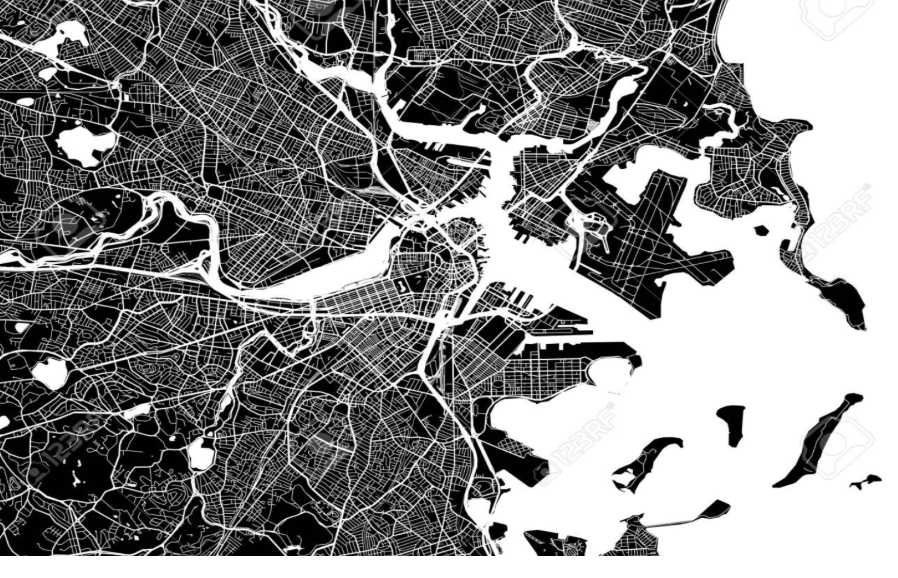

# **Checking response variable distribution**

Before we perform any regression, we must check the distribution of our response variable to ensure it is normally distributed. We can do this by the code:

<ipython-input-5-8ecf68631e7b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MEDV'], ax=ax[1])


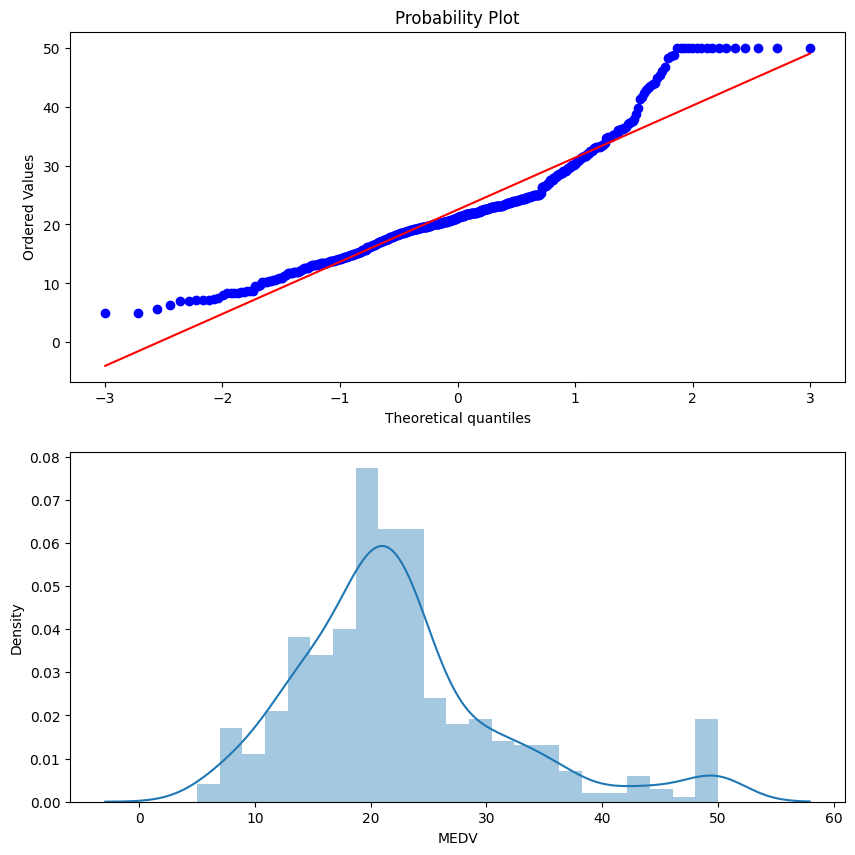

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
stats.probplot(df['MEDV'], plot=ax[0])
sns.distplot(df['MEDV'], ax=ax[1])
plt.show()

The analysis of the graphs reveals that the variable 'MEDV' demonstrates a distribution that approximates normality. However, it is important to note that the distribution is slightly skewed due to the presence of a few instances with abnormally high values of 'MEDV'. This observation is particularly evident in the QQ-Plot, where data points in the upper right corner consistently exceed the predicted values suggested by the model.

Despite the slight deviation from perfect normality, the aforementioned characteristics of the 'MEDV' variable do not pose a significant threat to the integrity and reliability of our regression model. The presence of outliers or extreme values in the dataset is a common phenomenon encountered in real-world scenarios. In fact, these atypical observations can often provide valuable insights and contribute to the overall understanding of the underlying data patterns.

# **Checking constant variability**

The code below generates a scatter plot to assess the constant variability, also known as homoscedasticity, of a regression model. The scatter plot compares the predicted values (x-axis) with the absolute residuals (y-axis). By examining the spread of the residuals across different predicted values, we can gain insights into whether the variability of the errors remains consistent or exhibits a systematic pattern.

The purpose of this analysis is to evaluate whether the assumption of constant variability holds in the regression model. Homoscedasticity is an important assumption for regression analysis because it ensures that the errors have a consistent spread across all levels of the predictor variables. If the scatter plot displays a random distribution of points with a relatively constant spread, it indicates that the model's assumption of constant variance is satisfied. On the other hand, if the scatter plot reveals a discernible pattern or increasing/decreasing spread of residuals, it suggests the presence of heteroscedasticity, indicating a violation of the assumption.


In [ ]:
model_fitted = sm.formula.ols(formula='MEDV~CRIM+CHAS+RM+DIS+TAX',data=df)
multi_reg=model_fitted.fit()
y_pred = multi_reg.predict()
residuals = df["MEDV"]-y_pred

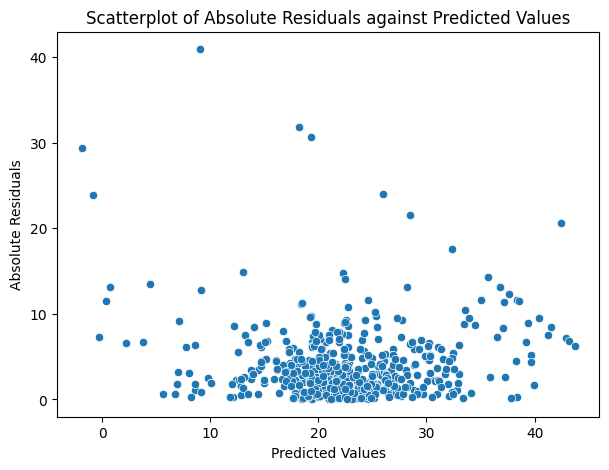

In [ ]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_pred, y=np.abs(residuals))
plt.xlabel("Predicted Values")
plt.ylabel("Absolute Residuals")
plt.title("Scatterplot of Absolute Residuals against Predicted Values")
plt.show()


Upon examining the scatter plot of absolute residuals against predicted values, it is evident that the assumption of constant variability, or homoscedasticity, is upheld by the regression model. The plot reveals a random distribution of points with a relatively consistent spread of residuals across the range of predicted values. This indicates that the model's estimates maintain a reliable level of precision and accuracy throughout.

Although a slight linear trend is observed, progressing from the top center to the bottom right of the scatter plot, it does not pose a significant concern in this context. The trend does not exhibit a substantial increase or decrease in the spread of residuals, indicating that the variability remains relatively constant. As a result, the violation of constant variability assumption is minimal, and its impact on the overall reliability and validity of the regression model is negligible.

Thus, based on the scatter plot analysis, it can be concluded that the regression model satisfies the assumption of constant variability, ensuring that the parameter estimates, hypothesis tests, and predictions derived from the model remain robust and accurate.

# **Checking indepedency of residuals**

To assess the independence of residuals in our regression model, we can employ a scatter plot by plotting the residuals against the order of collection. This analysis allows us to examine whether the residuals exhibit any discernible patterns or relationships with the order in which the data was collected.

By plotting the residuals on the y-axis and the order of collection on the x-axis, we can visually inspect the scatter plot for any signs of non-independence. If the residuals appear randomly scattered around the horizontal line, it suggests that the assumption of independence is upheld, indicating that the model's errors are not influenced by the order of data collection. On the other hand, if a specific pattern or trend emerges, it may imply that there are unaccounted factors or systematic influences affecting the residuals, thus violating the assumption of independence.



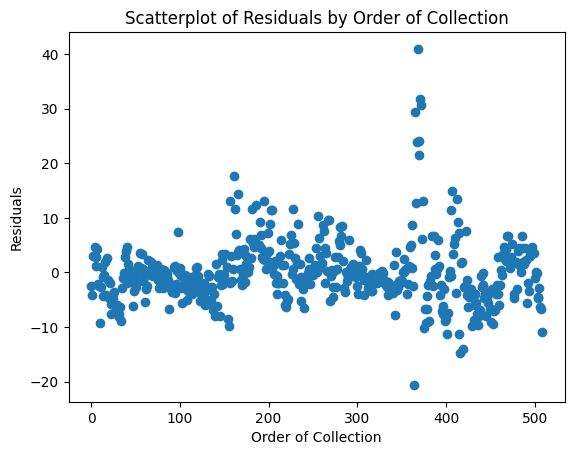

In [ ]:
order_of_collection = df.index

plt.scatter(order_of_collection, residuals)
plt.xlabel("Order of Collection")
plt.ylabel("Residuals")
plt.title("Scatterplot of Residuals by Order of Collection")
plt.show()

The examination of the scatter plot, which illustrates the residuals plotted against the order of collection, provides insight into the independence of the residuals in our regression model. The purpose of this analysis is to determine whether any discernible patterns or relationships exist between the residuals and the order in which the data was collected.

Upon careful inspection of the scatter plot, it becomes evident that there is no apparent trend or systematic pattern observed in the distribution of the residuals with respect to the order of collection. The scatter plot exhibits a random dispersion of residuals around the horizontal line, suggesting that the assumption of independence holds true. This implies that the errors in our regression model are not influenced or affected by the specific order in which the data points were collected.

# **Linear relationship between predictor and response variables**

In this section, we examine the relationship between the predictor variables and the response variable to determine if there is a linear association. Specifically, we focus on four predictor variables: 'CRIM', 'RM', 'TAX', and 'DIS'. The response variable, denoted as 'MEDV', represents the target variable we are trying to predict.

To investigate the linear relationship, we generate scatter plots of each predictor variable against the residuals. The residuals represent the differences between the observed response variable values and the predicted values based on the predictor variables. By plotting the residuals against the predictor variables, we can visually assess the linearity of the relationship.

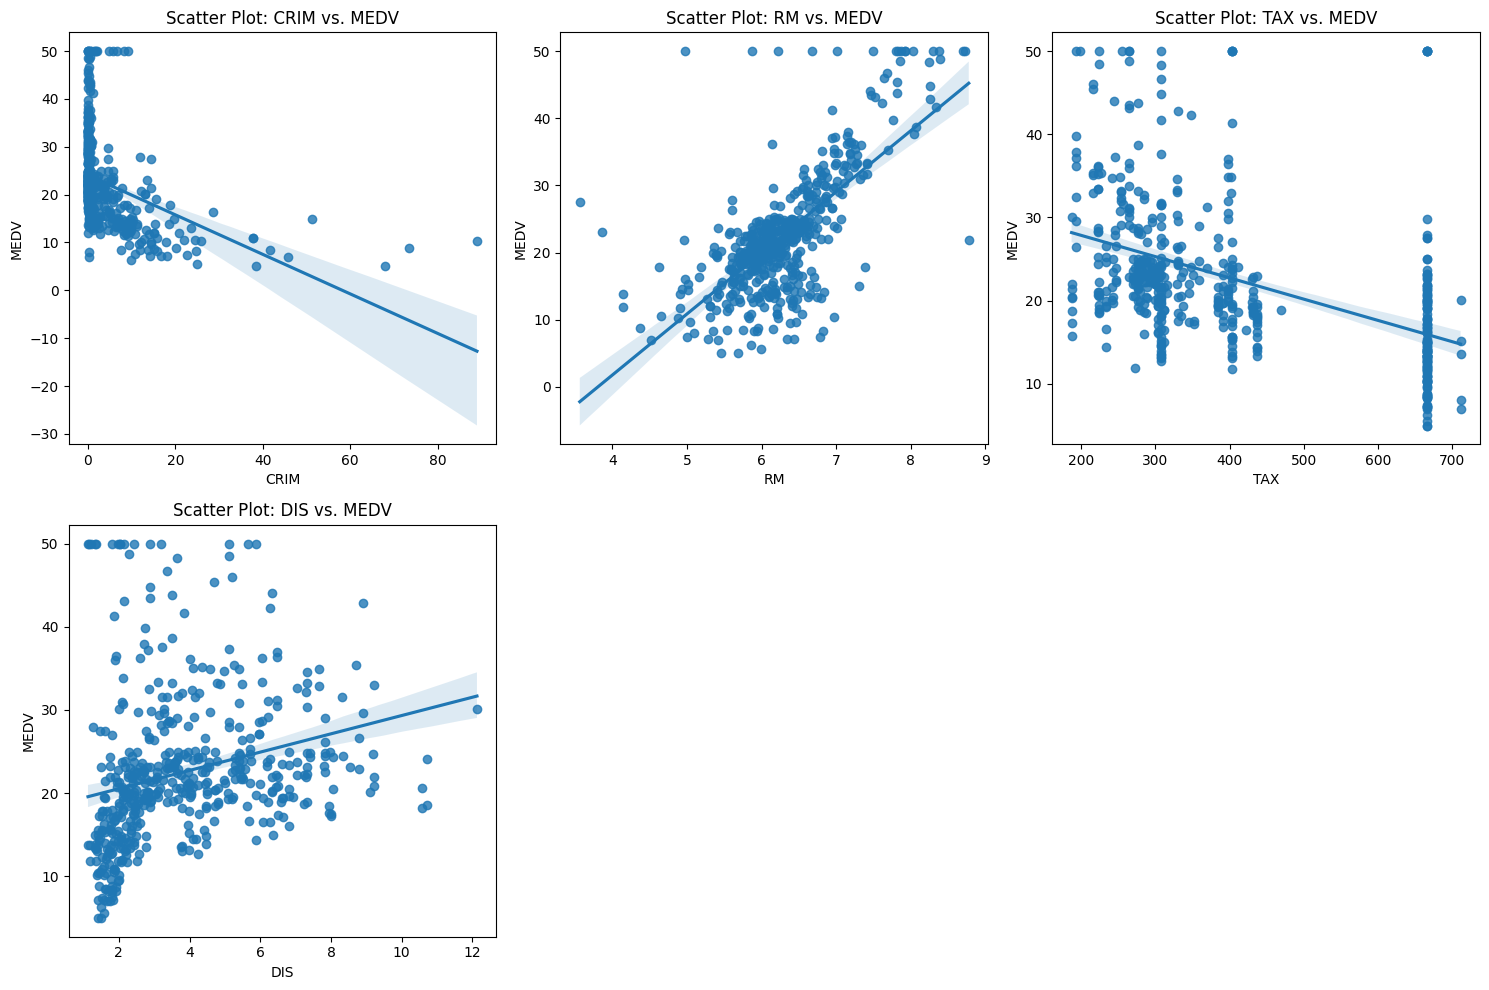

In [ ]:
# Plotting the relationship between explanatory variables and response variable

# Explanatory variables
explanatory_vars = ['CRIM', 'RM', 'TAX', 'DIS']

# Response variable
response_var = 'MEDV'

# Subplot grid
plt.figure(figsize=(15, 10))
subplot_rows = 2
subplot_cols = 3

# Generate subplots for each explanatory variable
for i, var in enumerate(explanatory_vars):
    # Subplot
    plt.subplot(subplot_rows, subplot_cols, i+1)

    # Scatter plot of explanatory variable vs. response variable
    sns.regplot(x=df[var], y=df[response_var])
    plt.xlabel(var)
    plt.ylabel(response_var)
    plt.title('Scatter Plot: {} vs. {}'.format(var, response_var))

# Adjust subplot spacing
plt.tight_layout()

# Display the plot
plt.show()


Upon examining the scatter plots, we observe that the data points are scattered randomly across the plots, forming point clouds. There is no clear curvature or discernible pattern in the data points that suggests non-linearity. This indicates that the relationship between the predictor variables and the response variable is predominantly linear in nature.

# **MODEL AND RESULTS**

Now wehen we finished cheking each condition we can move forward and eliminate not statistical significant variables. In order to assess the effectiveness and significance of our regression model, we need to examine the regression coefficients, standard errors, t-statistics, and particularly the p-values. These statistical measures provide valuable insights into the relationship between the explanatory variables (CRIM, CHAS, RM, TAX) and the response variable (MEDV). After finding out what p-values of our explonatory variables, we will be able to asses backward elimination to check wchih variables that not posses statistical significance to our resoponse our variable.

In [ ]:
model_fitted = sm.formula.ols(formula='MEDV~CRIM+CHAS+RM+DIS+TAX',data=df)
multi_reg=model_fitted.fit()
print(multi_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     141.5
Date:                Thu, 15 Jun 2023   Prob (F-statistic):           1.57e-93
Time:                        18:16:06   Log-Likelihood:                -1626.9
No. Observations:                 509   AIC:                             3266.
Df Residuals:                     503   BIC:                             3291.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -20.3656      2.870     -7.096      0.0

In the given table, we notice that the p-value for the variable "DIS" is 0.280, which is greater than 0.05. This indicates that the weighted distance to employment centers may not have a significant impact on the median value of owner-occupied homes (MEDV).

As a result, we can proceed with eliminating the "DIS" variable from our regression model. By re-estimating the model without the "DIS" variable, we can obtain a new set of regression coefficients and assess the model's performance using statistical measures such as R-squared, adjusted R-squared, and F-statistic.

The updated regression results after eliminating the "DIS" variable are provided in the revised table. The coefficients, standard errors, t-statistics, and p-values for the remaining variables (CRIM, CHAS, RM, TAX) are presented.

In [ ]:
model_fitted = sm.formula.ols(formula='MEDV~CRIM+CHAS+RM+TAX',data=df)
multi_reg=model_fitted.fit()
print(multi_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     176.6
Date:                Thu, 15 Jun 2023   Prob (F-statistic):           1.99e-94
Time:                        18:22:24   Log-Likelihood:                -1627.5
No. Observations:                 509   AIC:                             3265.
Df Residuals:                     504   BIC:                             3286.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -21.2098      2.762     -7.678      0.0

Having a new summary, we can now see that all variables are statistically significant. Furthermore, we can check the condition for fitting a regression line: linearity, normally distributed residuals and constant variability.

Now having checked conditions for the regression, we can move forward and create our model prediction formula, which is as follows:

**ȳ = β₀ + β₁X₁ + β₂X₂ + β₃X₃ + β₄X₄**

**ȳ = -21.2098 -0.1376 * X₁ + 3.8195 * X₂ + 7.7564 * X₃ -0.0116 * X₄**

Each β variable is indicated by the followin discription:

β₀ (Intercept):
In the regression model, the intercept (β₀) represents the estimated value of the dependent variable (MEDV) when all the independent variables (CRIM, CHAS, RM, TAX) are zero. In this case, the intercept is -21.2098, indicating that when all the independent variables are zero, the estimated value of MEDV is -21.2098.

β₁ (CRIM):
The beta coefficient for the independent variable CRIM is -0.1376. It suggests that for a one-unit increase in CRIM, holding all other variables constant, the estimated change in MEDV is -0.1376. In other words, as the crime rate (CRIM) increases, the estimated value of MEDV tends to decrease by -0.1376.

β₂ (CHAS):
The beta coefficient for the independent variable CHAS is 3.8195. It indicates that when the CHAS variable changes from 0 to 1 (CHAS is a binary variable representing whether the property is located on the Charles River or not), holding other variables constant, the estimated change in MEDV is 3.8195. This suggests that properties located on the Charles River tend to have higher estimated MEDV values compared to those not located on the river.

β₃ (RM):
The beta coefficient for the independent variable RM is 7.7564. It implies that for a one-unit increase in RM (average number of rooms per dwelling), while holding other variables constant, the estimated change in MEDV is 7.7564. This indicates that properties with a higher number of rooms tend to have higher estimated MEDV values.

β₄ (TAX):
The beta coefficient for the independent variable TAX is -0.0116. It suggests that for a one-unit increase in TAX (full-value property-tax rate per $10,000), while holding other variables constant, the estimated change in MEDV is -0.0116. This implies that as the property tax rate (TAX) increases, the estimated value of MEDV tends to decrease by -0.0116.

Now we can create regression model and we can finally plot it to see if our variables have impact on our response variable.

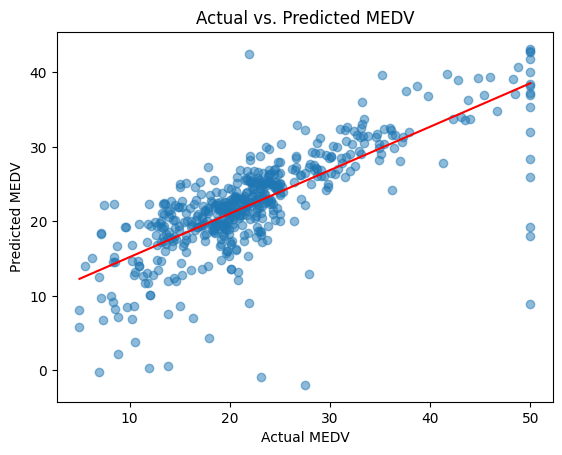

In [ ]:
# Scatter plot
plt.scatter(df['MEDV'], y_pred, alpha=0.5)
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actual vs. Predicted MEDV')

# Regression line
slope, intercept = np.polyfit(df['MEDV'], y_pred, 1)
x = np.linspace(np.min(df['MEDV']), np.max(df['MEDV']), 100)
y = slope * x + intercept
plt.plot(x, y, color='red')

plt.show()





# **Results**

Upon examining the scatter plot and regression line generated from the regression model, it is evident that the model is not perfect. Although there is a general trend of the predicted values aligning with the actual values, there are some deviations observed.

The scatter plot shows a scattered distribution of points around the regression line, indicating that the model's predictions are not entirely precise. Some points appear to deviate from the line, suggesting that the model may not capture all the complexities and nuances of the relationship between the predictor variables and the response variable.

However, despite these deviations, the overall performance of the model appears to be reasonable. The majority of the points are relatively close to the regression line, suggesting that the model's predictions are generally accurate. While there is room for improvement, the model's ability to predict the response variable (MEDV) is acceptable given the observed scatter plot.

With an adjusted R-squared value of 0.580, it indicates that approximately 58% of the variability in the response variable (MEDV) can be accounted for by the predictor variables included in the model. This suggests that the selected predictor variables have a moderate level of explanatory power in explaining the variability observed in the response variable.

While an adjusted R-squared of 0.580 signifies a decent fit of the model, it also implies that approximately 42% of the variance in the response variable remains unexplained. This unexplained portion may be attributed to factors not captured by the predictor variables included in the model or inherent randomness in the data.

# **Conclusions**

Based on the analysis conducted on the given dataset and considering the specified hypothesis, the findings provide evidence to rejct the null hypothesis. The results indicate that there is a significant relationship between the explanatory variables (per capita crime rate, Charles River proximity, average number of rooms, weighted distance to employment centres, and property tax rate) and the median value of owner-occupied homes.

The regression model, including the aforementioned explanatory variables, yielded coefficients (Bi) for each variable. The coefficients represent the estimated impact of each variable on the median value of owner-occupied homes while controlling for the other explanatory variables.

In the context of the null hypothesis, which assumes no significant relationship between the explanatory variables and the median value of homes, the hypothesis is rejected. This is supported by the fact that the coefficients (Bi) for the variables were found to be statistically significant, indicating that each variable contributes significantly to the prediction of housing prices.

Therefore, based on the analysis and hypothesis testing, it can be concluded that there is indeed a significant relationship between the specified explanatory variables and the median value of owner-occupied homes in the dataset. These findings have important implications for understanding the factors influencing housing prices and can inform stakeholders such as real estate agents, homeowners, and policymakers.

# **Limitation**

The selection of explanatory variables was based on the specified list (per capita crime rate, Charles River proximity, average number of rooms, weighted distance to employment centers, and property tax rate). While these variables provide some insights into housing prices, there may be other relevant factors that were not considered. Factors such as proportion of non-retail business acres per town, nitric oxides concentration, the proportion of blacks by town or proportion of owner-occupied units built prior to 1940, which where also included in a data set could potentially influence housing prices but were not included in the analysis.

Additionally, the regression model utilized data up until a certain cutoff date, which might affect the model's applicability to current housing market conditions. The findings are based on historical data and may not capture recent changes or trends in the housing market. Therefore, caution should be exercised when applying the model's conclusions to present-day scenarios.



# **References**

[1] Boston Map: https://www.123rf.com/photo_109847412_stock-vector-simple-map-of-boston-massachusetts-usa-black-and-white-version-for-clean-backgrounds-and-prints-this.html

[2] Data Set: https://www.kaggle.com/datasets/shubhammeshram579/house